# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

# Leser datasett

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../Task5/agaricus-lepiota.data', thousands=',').dropna()

X = df.drop(columns='edibility') # Ta med eller ikke?
X = pd.get_dummies(X, columns=X.columns)
print(X.shape)

(8124, 117)


# Gjør PCA decomposition
for å få 3 dimensjoner

In [91]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)
print(Xpca.shape)

(8124, 3)


# Evaluering
Her finner jeg ut hvilken mengde med clusters som er best for å dele inn datasettet. Evalueringsmetoden jeg bruker er silhouette score.

In [92]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
import numpy as np

clusters = 15
scores = np.zeros(clusters-2)

for i in range(2, clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Xpca)
    y_kmeans = kmeans.predict(Xpca)
    score=metrics.silhouette_score(Xpca, y_kmeans)
    scores[i-2]=score
    print("Number of clusters: ", i, " Score: ", score)
    
best_n_clusters = np.argmax(scores)
print("\n\nThe optimal number of clusters is: ", best_n_clusters+2)

Number of clusters:  2  Score:  0.44848667113374735
Number of clusters:  3  Score:  0.6044929508346237
Number of clusters:  4  Score:  0.6636872419848646
Number of clusters:  5  Score:  0.6588657356784079
Number of clusters:  6  Score:  0.6430774972908548
Number of clusters:  7  Score:  0.5590359236657025
Number of clusters:  8  Score:  0.5597841897364227
Number of clusters:  9  Score:  0.5540703393495817
Number of clusters:  10  Score:  0.5346721021635809
Number of clusters:  11  Score:  0.45989238971540236
Number of clusters:  12  Score:  0.3931825566562356
Number of clusters:  13  Score:  0.4554201914502028
Number of clusters:  14  Score:  0.4523083849491105


The optimal number of clusters is:  4


# Plotter evalueringen

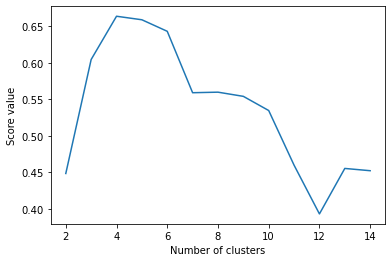

In [94]:
x_values = np.arange(2, len(scores) + 2)

plt.plot(x_values, scores)
plt.xlabel("Number of clusters")
plt.ylabel("Score value")
plt.show()

# Visualisering av data med optimal antal cluster

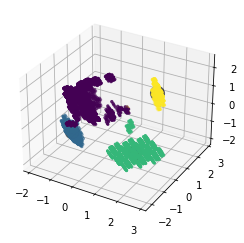

In [95]:
kmeans = KMeans(n_clusters=best_n_clusters+2)
kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:,2], c=y_kmeans, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

plt.show()